In [31]:
# 1. 기본 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [32]:
# 2. 데이터 불러오기
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
# 3. 결측치 확인
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [34]:
# 3. 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [35]:
# 4. X, y 분리
X = df.drop('charges', axis=1).values
y = df['charges'].values.reshape(-1, 1)  # charges는 연속형 값!

In [36]:
# 5. 데이터 정규화 (X, y 모두)
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [37]:
X

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [38]:
y

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [39]:
# 6. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

In [42]:
# 7. 모델 구성
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.0005) 
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# 8. 모델 학습
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=32, validation_split=0.1) # 학습


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8412 - mse: 0.8412 - val_loss: 0.5661 - val_mse: 0.5661
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3289 - mse: 0.3289 - val_loss: 0.2858 - val_mse: 0.2858
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2044 - mse: 0.2044 - val_loss: 0.2546 - val_mse: 0.2546
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1469 - mse: 0.1469 - val_loss: 0.2401 - val_mse: 0.2401
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1359 - mse: 0.1359 - val_loss: 0.2471 - val_mse: 0.2471
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1349 - mse: 0.1349 - val_loss: 0.2492 - val_mse: 0.2492
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1387 - mse: 0.1387 - val_loss: 0.2672 - val_mse: 0.2672
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1641 - mse: 0.1641 - val_loss: 0.2481 - val_mse: 0.2481
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.128

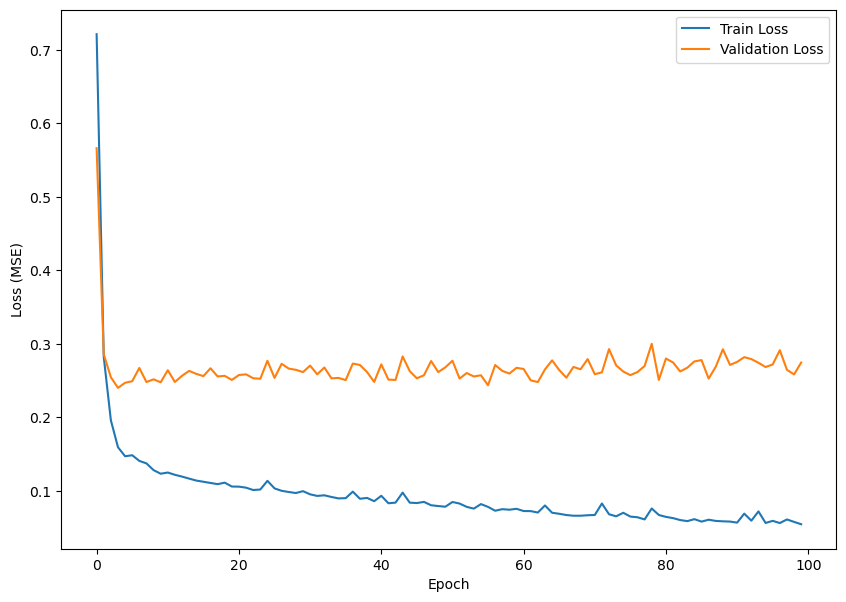



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1492 - mse: 0.1492


[0.15178021788597107, 0.15178021788597107]

In [46]:
# 9. 학습 과정 시각화
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# 모델 성능 평가
print("\n=====================================================\n")
model.evaluate(X_test, y_test) # loss와 metrics으로 mse 값 출력

In [45]:
# 10. 모델 평가
y_pred = model.predict(X_test)

# 예측 결과 inverse_transform (원래 charges 스케일로 복원)
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)

# 11. 성능 지표 출력
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2*100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 22242294.30
RMSE: 4716.17
R² Score: 86.02%
